In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import spectral
from scipy.io import loadmat
import os
from HSI_class import HSI

# Check if GPU is available
print("GPU Available:", torch.cuda.is_available())

# If available, print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU Available: True
GPU Name: NVIDIA GeForce GTX 1650


In [2]:
dataset_path = "Hyperspectral oil spill detection datasets"

dataset = []

i = 0
for filename in os.listdir(dataset_path):
    print(i)
    if i > 1:
        print("break")
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        dataset.append(hsi)
    i += 1

0
Processing file: Hyperspectral oil spill detection datasets\GM01.mat
1
Processing file: Hyperspectral oil spill detection datasets\GM02.mat
2
break


In [3]:
for hsi in dataset:
    print(f'{hsi.name}: {hsi.img.shape}')

GM01: (1243, 684, 224)
GM02: (1786, 699, 224)


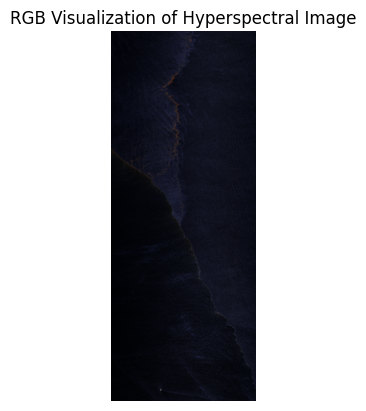

In [4]:
img = dataset[1].img
gt = dataset[1].gt
r_band = 31  # Red (around 660 nm) https://www.indexdatabase.de/db/s-single.php?id=28
g_band = 22  # Green (around 560 nm)
b_band = 10 # Blue (around 450 nm)

red_band = img[:, :, r_band]  # Adjust band index for red
green_band = img[:, :, g_band]  # Adjust band index for green
blue_band = img[:, :, b_band]  # Adjust band index for blue

# Normalize bands to range 0-1 for proper visualization
red_band = (red_band - np.min(red_band)) / (np.max(red_band) - np.min(red_band))
green_band = (green_band - np.min(green_band)) / (np.max(green_band) - np.min(green_band))
blue_band = (blue_band - np.min(blue_band)) / (np.max(blue_band) - np.min(blue_band))

rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Visualization of Hyperspectral Image")
plt.axis('off')
plt.show()

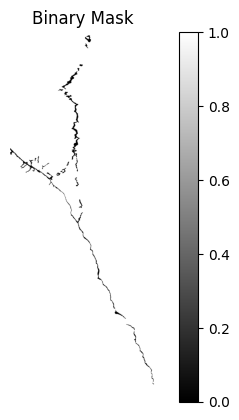

In [5]:
# Visualize the binary mask
plt.imshow(1 - gt, cmap='gray')  # Use 'gray' for binary visualization
plt.colorbar()
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [6]:
import createSample as CS
hsi_ = dataset[0]
patch_size = 9
sample_per_class = 5
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_, patch_size, sample_per_class)

hsi shape
(1243, 684, 224)
5 Randomly chosen 0 indices: [(np.int64(1160), np.int64(383)), (np.int64(985), np.int64(151)), (np.int64(377), np.int64(456)), (np.int64(311), np.int64(667)), (np.int64(1041), np.int64(540))]
5 Randomly chosen 1 indices: [(np.int64(964), np.int64(41)), (np.int64(315), np.int64(483)), (np.int64(1061), np.int64(103)), (np.int64(955), np.int64(485)), (np.int64(361), np.int64(226))]
(1243, 684, 224)
(1251, 692, 224)
1160 383 1160 383
985 151 985 151
377 456 377 456
311 667 311 667
1041 540 1041 540
964 41 964 41
315 483 315 483
1061 103 1061 103
955 485 955 485
361 226 361 226
seed pixel in data class 0
[-250 -422  330  394  414  542  614  606  581  544  511  469  426  392
  363  338  315  286  261  239  213  186  170  145  124  114   99   97
   87   84   77   72   67   66   55   47   29   25   13  -22   -2   16
   21  -18    5   14   12    9    8   -9  -10    1   17    9   12    8
    8   -6  -10  -18  -15  -59 -125  -85  -15   -4    2    4    7   10
   11    7 

In [7]:
i =0
half_patch = patch_size // 2
print(hsi_.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-250 -422  330  394  414  542  614  606  581  544  511  469  426  392
  363  338  315  286  261  239  213  186  170  145  124  114   99   97
   87   84   77   72   67   66   55   47   29   25   13  -22   -2   16
   21  -18    5   14   12    9    8   -9  -10    1   17    9   12    8
    8   -6  -10  -18  -15  -59 -125  -85  -15   -4    2    4    7   10
   11    7    9    7    9    7    2    0   -9  -24 -190 -205 -117 -140
  -32   -7   -1   -8   -4  -10   -3    3   12    8    7   11    7    7
   11   -1    0    0   -3  -60  -52  -25    0    0    0    0    0    0
    0    0    0 -106  -55  -52  -47  -27  -19   -1   -1   -1   -1    0
    2    3    3    0    2    0    4    5    6    9    4    2    0    5
   -3    4    0    1    0    6   -4   -2   -2    0  -35  -40    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  -51  -21  -13  -11  -17  -38  -27   -7   -4   -3   -5    4    0
    4    7    3    1    4   -2    2    4    2    2    0    0    0   -3
    1 

In [8]:
print(f"selected patch 0: {selected_patch_0.shape}")
print(f"selected patch 1: {selected_patch_1.shape}")

print(random_indices_0)
print(random_indices_1)

selected patch 0: (5, 9, 9, 224)
selected patch 1: (5, 9, 9, 224)
[(np.int64(1160), np.int64(383)), (np.int64(985), np.int64(151)), (np.int64(377), np.int64(456)), (np.int64(311), np.int64(667)), (np.int64(1041), np.int64(540))]
[(np.int64(964), np.int64(41)), (np.int64(315), np.int64(483)), (np.int64(1061), np.int64(103)), (np.int64(955), np.int64(485)), (np.int64(361), np.int64(226))]


In [9]:
indices = random_indices_0 + random_indices_1

# Concatenating along axis 0
x_train = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
# Print shape to verify
print(x_train.shape)  # Expected output: (10, 9, 9, 224)
print(y_train.shape) 

print(indices)

(10, 9, 9, 224)
(10,)
[(np.int64(1160), np.int64(383)), (np.int64(985), np.int64(151)), (np.int64(377), np.int64(456)), (np.int64(311), np.int64(667)), (np.int64(1041), np.int64(540)), (np.int64(964), np.int64(41)), (np.int64(315), np.int64(483)), (np.int64(1061), np.int64(103)), (np.int64(955), np.int64(485)), (np.int64(361), np.int64(226))]


In [10]:
# Augmentation
import augmentation as aug

n_category = 2
band_size = 224
num_per_category = 50

data_augment, label_augment = aug.Augment_data(x_train, y_train, n_category, patch_size, band_size, num_per_category)

j:  100


In [11]:
print(data_augment.shape)
print(label_augment.shape)

print(label_augment)

# Count occurrences of each unique element
counts = np.bincount(label_augment)

# Print results
for i, count in enumerate(counts):
    print(f"Element {i} occurs {count} times.")

(100, 9, 9, 224)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Element 0 occurs 50 times.
Element 1 occurs 50 times.


In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import vgg16

In [13]:
class VGG16_HSI(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG16_HSI, self).__init__()

         # Custom Convolutional Layer: Process 9x9x224 input
        self.pre_conv = nn.Sequential(
            nn.Conv2d(in_channels=224, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.AdaptiveAvgPool2d((1, 1))  # Reduce to (256, 1, 1)
        )

        # Fully Connected Layer to reshape to (64, 56, 56)
        self.fc = nn.Linear(256 * 1 * 1, 64 * 56 * 56)

        # Load VGG-16 Model
        self.vgg = vgg16(pretrained=True)

        # Remove first VGG-16 conv layer
        self.vgg.features = nn.Sequential(*list(self.vgg.features.children())[1:])

        # Modify classifier to output 2 classes
        self.vgg.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        # print(f'before {x.shape}')
        x = self.pre_conv(x)  # Process hyperspectral input
        x = x.view(x.size(0), -1)  # Flatten

        # print(f'after preconv {x.shape}')
        x = self.fc(x)  # Fully connected layer
        # print(f'after fc {x.shape}')
        # Reshape to (batch_size, 64, 56, 56) before passing to VGG
        x = x.view(x.size(0), 64, 56, 56)
        # print(f'after reshape, before vgg second layer {x.shape}')

        x = self.vgg.features(x)  # Pass to VGG-16
        x = self.vgg.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.vgg.classifier(x)  # Final classification layer

        return x


In [14]:
test = data_augment[0]
test = torch.tensor(test)
test = test.to(torch.float32)
test = test.unsqueeze(0)

print(test.shape)

torch.Size([1, 9, 9, 224])


In [15]:
# Example usage
print("creating model...")
model = VGG16_HSI()
print("model created")


creating model...


c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model created


In [16]:
print(model)

VGG16_HSI(
  (pre_conv): Sequential(
    (0): Conv2d(224, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Linear(in_features=256, out_features=200704, bias=True)
  (vgg): VGG(
    (features): Sequential(
      (0): ReLU(inplace=True)
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU(inplace=True)
      (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)


In [17]:
input = test
input = input.permute(0, 3, 1, 2)


# Pass the input through the model
output = model(input)

# Print the output shape
print("Output Shape:", output.shape)

output_value = output.detach().numpy() 
print(output_value)

Output Shape: torch.Size([1, 2])
[[-0.06481774  0.24042273]]


In [18]:
from torch.utils.data import Dataset, DataLoader

num_train_samples = 100
num_val_samples = 1000
num_channels = 224  # Hyperspectral bands
height, width = 9, 9

X_train = data_augment
X_train = torch.tensor(X_train)
X_train = X_train.to(torch.float32)
X_train = X_train.permute(0, 3, 1, 2)
print(X_train.shape)

y_train = torch.tensor(label_augment)

print(y_train.shape)


torch.Size([100, 224, 9, 9])
torch.Size([100])


In [ ]:
# Generate validation data
hsi_val = dataset[0]
patch_size = 9
sample_per_class = 20
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_val, patch_size, sample_per_class)


hsi shape
(1243, 684, 224)
5 Randomly chosen 0 indices: [(np.int64(884), np.int64(454)), (np.int64(643), np.int64(141)), (np.int64(321), np.int64(143)), (np.int64(949), np.int64(404)), (np.int64(1223), np.int64(420)), (np.int64(1064), np.int64(342)), (np.int64(49), np.int64(277)), (np.int64(737), np.int64(179)), (np.int64(827), np.int64(482)), (np.int64(154), np.int64(524)), (np.int64(918), np.int64(585)), (np.int64(680), np.int64(648)), (np.int64(1185), np.int64(483)), (np.int64(999), np.int64(2)), (np.int64(33), np.int64(339)), (np.int64(88), np.int64(484)), (np.int64(354), np.int64(11)), (np.int64(280), np.int64(87)), (np.int64(1024), np.int64(494)), (np.int64(698), np.int64(194))]
5 Randomly chosen 1 indices: [(np.int64(156), np.int64(133)), (np.int64(204), np.int64(129)), (np.int64(256), np.int64(160)), (np.int64(635), np.int64(635)), (np.int64(563), np.int64(423)), (np.int64(1176), np.int64(152)), (np.int64(1154), np.int64(105)), (np.int64(163), np.int64(179)), (np.int64(1042), n

In [20]:

indices = random_indices_0 + random_indices_1

# Concatenating along axis 0
X_val = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
# Print shape to verify
X_val = torch.tensor(X_val)
X_val = X_val.to(torch.float32)
X_val = X_val.permute(0, 3, 1, 2)
print(X_val.shape)  # Expected output: (10, 9, 9, 224)


y_val = np.array([])

gt = hsi_val.gt
for indice in indices:
    y_val = np.append(y_val, gt[indice[0]][indice[1]])

y_val = torch.tensor(y_val)
y_val = y_val.to(torch.long)
print(y_val)
print(y_val.shape) 

torch.Size([40, 224, 9, 9])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
torch.Size([40])


In [21]:
# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    

In [22]:
# Create separate datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

# Create DataLoaders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Fetching a batch from the training set
for images, labels in train_loader:
    print(f"Training Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break

# Example: Fetching a batch from the validation set
for images, labels in val_loader:
    print(f"Validation Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break

Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Training Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10])
Validation Batch - images shape: torch.Size([10, 224, 9, 9]), labels shape: torch.Size([10

In [23]:

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = torch.nn.CrossEntropyLoss()

In [24]:


def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 5 == 4:
            last_loss = running_loss / 5 # loss  per 5 batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [26]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 50

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    print("checkpoint 1: after training_one_epoch()")

    running_vloss = 0.0
    correct = 0
    total = 0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    print("checkpoint 2: after model eval()")

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

            # Compute accuracy
            _, predicted = torch.max(voutputs, 1)  # Get predicted class index
            correct += (predicted == vlabels).sum().item()
            total += vlabels.size(0)


    avg_vloss = running_vloss / (i + 1)
    accuracy = 100 * correct / total

    print('LOSS train {} valid {} | Accuracy: {:.2f}%'.format(avg_loss, avg_vloss, accuracy))
    print("checkpoint 3: after calculating loss and accuracy")  

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.add_scalar('Validation Accuracy', accuracy, epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = './models/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 5 loss: 0.6696913957595825
  batch 10 loss: 0.7243310213088989
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.7243310213088989 valid 0.6962977051734924 | Accuracy: 55.00%
checkpoint 3: after calculating loss and accuracy
EPOCH 2:
  batch 5 loss: 0.776345157623291
  batch 10 loss: 0.17143718153238297
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.17143718153238297 valid 0.3590180277824402 | Accuracy: 80.00%
checkpoint 3: after calculating loss and accuracy
EPOCH 3:
  batch 5 loss: 0.02156746559776366
  batch 10 loss: 0.061200251191621646
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.061200251191621646 valid 1.7461222410202026 | Accuracy: 52.50%
checkpoint 3: after calculating loss and accuracy
EPOCH 4:
  batch 5 loss: 0.7801648169755936
  batch 10 loss: 0.43649245500564576
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS 

In [27]:
def predict(input):

    with torch.no_grad():  # Disable gradients for inference
        output = model(input)

    # Convert logits to class label
    predicted_class = torch.argmax(output, dim=1).item()
    confidence = torch.nn.functional.softmax(output, dim=1)[0, predicted_class].item()

    return predicted_class, confidence

In [28]:
import zeroPadding
hsi_test = dataset[0]

test_img = hsi_test.img
test_gt = hsi_test.gt

width = test_img.shape[0]
height = test_img.shape[1]

matrix=zeroPadding.zeroPadding_3D(test_img,half_patch) #add 0 in every side of the data
print(test_img.shape)
print(matrix.shape)
print(f"number of pixel {width * height}")


total = 0
correct = 0

test = 1
break_flag = 0
for i in range(width):
    if break_flag == 1:
        break
    
    for j in range(height):
        if test > 10000:
            print("break")
            break_flag = 1
            break
        x_pos = i
        y_pos = j
        selected_rows = matrix[range(x_pos,x_pos+2*half_patch+1), :]
        testing_patch = selected_rows[:, range(y_pos, y_pos+2*half_patch+1)]

        testing_patch = torch.tensor(testing_patch)
        testing_patch = testing_patch.to(torch.float32)
        testing_patch = testing_patch.unsqueeze(0)
        testing_patch = testing_patch.permute(0, 3, 1, 2)

        prediction, confidence = predict(testing_patch)

        true_label = test_gt[i][j]

        print(f"{test}: {testing_patch.shape}: {prediction}, {confidence}, expecteed class: {true_label}")

        if(prediction == true_label):
            correct += 1

        test +=1
        total += 1

print(f"{correct}/{total}")
     



(1243, 684, 224)
(1251, 692, 224)
number of pixel 850212
1: torch.Size([1, 224, 9, 9]): 0, 0.6679149270057678, expecteed class: 0
2: torch.Size([1, 224, 9, 9]): 0, 0.6678676009178162, expecteed class: 0
3: torch.Size([1, 224, 9, 9]): 0, 0.6680949330329895, expecteed class: 0
4: torch.Size([1, 224, 9, 9]): 0, 0.6897664070129395, expecteed class: 0
5: torch.Size([1, 224, 9, 9]): 0, 0.9782583117485046, expecteed class: 0
6: torch.Size([1, 224, 9, 9]): 0, 0.9763270616531372, expecteed class: 0
7: torch.Size([1, 224, 9, 9]): 0, 0.9735952019691467, expecteed class: 0
8: torch.Size([1, 224, 9, 9]): 0, 0.9695181846618652, expecteed class: 0
9: torch.Size([1, 224, 9, 9]): 0, 0.9652579426765442, expecteed class: 0
10: torch.Size([1, 224, 9, 9]): 0, 0.9585602283477783, expecteed class: 0
11: torch.Size([1, 224, 9, 9]): 0, 0.9601799249649048, expecteed class: 0
12: torch.Size([1, 224, 9, 9]): 0, 0.9611791372299194, expecteed class: 0
13: torch.Size([1, 224, 9, 9]): 0, 0.9599445462226868, expecteed